This is a project about New York City public schools. For a brief background, the SAT, or Scholastic Aptitude Test, is a test that high school seniors in the U.S. take every year and it has 3 sections, each of which is worth a maximum of 800 points. Colleges use the SAT to determine which students to admit. High average SAT scores are usually indicative of a good school.
New York City has published data on student SAT scores by high school, along with additional demographic data sets.  

New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair.


We will gather data from various datasets and combine them into a single dataframe. These are the datasets we will combine:

* SAT scores by school - SAT scores for each high school in New York City
* School attendance - Attendance information for each school in New York City
* Class size - Information on class size for each school
* AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
* Graduation outcomes - The percentage of students who graduated, and other outcome information
* Demographics - Demographic information for each school
* School survey - Surveys of parents, teachers, and students at each school



# Read the data and import libraries

In [117]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [118]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}
for x in data_files:  
    y = pd.read_csv("https://raw.githubusercontent.com/AngelosTheodorakis/Data_Analysis_Projects/master/Analyzing%20NY%20High%20School%20Data/schools/{}".format(x), error_bad_lines=False)
    data[x.replace(".csv", "")] = y
    

Above we read all the datasets and created a dictionary called 'data', where all the datasets are stored. Now we will read the surveys, which are in .txt form

In [119]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0,sort=True) # We combine the datasets

In [120]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


We have 2773 columns. We will keep only a small number of them. We can consult the data dictionary from the City of New York's website to see a description of the columns.

In [121]:
survey["DBN"] = survey["dbn"] # Create DBN column instead of dbn

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

survey = survey.loc[:,survey_fields]
data["survey"] = survey


# Add DBN columns

The DBN column is the School identification code (district borough number). It's important because it will alow us to combine different datasets that have this common column. But class_size dataset doesn't appear to have the column as we can see below:

In [122]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"] # Create DBN column instead of dbn

In [123]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


The DBN column that is missing, should be something like the following (taken from the sat_results dataset):

In [124]:
data['sat_results']['DBN']

0      01M292
1      01M448
2      01M450
3      01M458
4      01M509
        ...  
473    75X012
474    75X754
475    79M645
476    79Q950
477    79X490
Name: DBN, Length: 478, dtype: object

We can see that the DBN in the sat_results data is a combination of the CSD and SCHOOL CODE columns in the class_size data. However the CSD portion of DBN column always consists of two digits. So we'll need to add a leading 0 to the CSD if the CSD is less than two digits long.

In [125]:
def pad_csd(x):
    x = str(x)
    if len(x) > 1:
        return x
    else:
        return "0" + x
    


In [126]:
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd) # We created a column with 2-digits CSD
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"] # We create the DBN column

In [127]:
data["class_size"].head() # We check our new columns in class_size datasets.

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


We will now create a column that sums up the SAT scores for the different sections of the exam. First we'll need to convert them to numeric. Let's see the columns:


In [128]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [129]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score'] # List of columns
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce") # Convert to numeric

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]] # Sum the columns



# Extract latitude and longitude

Next, we'll want to find the latitude and longitude coordinates for each school. This will enable us to map the schools and find geographic patterns in the data. The coordinates are currently in the Location 1 column in the hs_directory data set, but we need to extract them:

In [130]:
data['hs_directory']['Location 1']

0      883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1      1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2      1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
3      411 Pearl Street\nNew York, NY 10038\n(40.7106...
4      160-20 Goethals Avenue\nJamaica, NY 11432\n(40...
                             ...                        
430    2225 Webster Avenue\nBronx, NY 10457\n(40.8546...
431    925 Astor Avenue\nBronx, NY 10469\n(40.8596983...
432    800 East Gun Hill Road\nBronx, NY 10467\n(40.8...
433    26 Broadway\nNew York, NY 10004\n(40.705234939...
434    149-11 Melbourne Avenue\nFlushing, NY 11367\n(...
Name: Location 1, Length: 435, dtype: object

In [131]:
import re
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip() # With strip we remove leading characters
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat) # Create latitude and longitude columns
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce") # Convert them to numeric
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

# Condense datasets

Next what we'll need to do in preparation for the merge, is condense some of the data sets. The values in the DBN column are unique in the sat_results data set but other data sets like class_size have duplicate DBN values. A single row in the sat_results data set may match multiple rows in the class_size data set, for example. This will create problems, because we don't know which of the multiple entries in the class_size data set we should combine with the single matching entry in sat_results. To resolve this issue, we'll condense these datasets:
* class_size 
* graduation
* demographics

so that each DBN is unique. The unique values for GRADE in the class_size dataset, are the following:

In [132]:
data["class_size"]["GRADE "]

0           0K
1           0K
2           01
3           01
4           02
         ...  
27606    09-12
27607    09-12
27608    09-12
27609    09-12
27610      NaN
Name: GRADE , Length: 27611, dtype: object

Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12. Also each school can have multiple program types. Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED.

In [133]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

As we saw class_size DBN isn't unique. This is due to the CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) columns.


In [134]:
data['class_size'][['DBN','CORE COURSE (MS CORE and 9-12 ONLY)']].iloc[200:220]

,DBN,CORE COURSE (MS CORE and 9-12 ONLY)
200,01M188,MS Science Core
201,01M188,MS Social Studies Core
202,01M188,MS English Core
203,01M188,MS Math Core
204,01M188,MS Science Core
205,01M188,MS Social Studies Core
206,01M188,NaN
207,01M292,-
208,01M292,-
209,01M292,-


 We want our class_size data to include every class a school offers and not just a subset of them.So we will take the average across all of the classes a school offers. This will give us unique DBN values.

In [135]:
class_size = class_size.groupby("DBN").agg(np.mean) # Group by DBN and find the mean of all classes
class_size.reset_index(inplace=True) # Show index as column
data["class_size"] = class_size # Store class_size in the data dictionary as class_size dataset

We continue with demographics dataset. Here, the column that prevents a DBN from being unique is schoolyear. We will select rows where schoolyear is 2011-2012.

In [136]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]


Finally, we'll need to condense the graduation data set:

In [137]:
data["graduation"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


The Demographic and Cohort columns are what prevent DBN from being unique in the graduation data. A Cohort refers to the year the data represents, and the Demographic refers to a specific demographic group. We will pick data from the most recent Cohort available, which is 2006. We also only pick rows where Demographic is Total Cohort.

In [138]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

We will now convert the Advanced Placement (AP) test scores from strings to numeric values. We want to find out later, whether AP exam scores are correlated with SAT scores across high schools.

In [139]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for x in cols:
    data["ap_2010"][x] = pd.to_numeric(data["ap_2010"][x], errors="coerce")

# Combine the datasets

Both the ap_2010 and the graduation data sets have many missing DBN values, so we'll use a left join when we merge the sat_results data set with them.

In [140]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")



Because the remaining datasets we have to merge ("class_size", "demographics", "survey", "hs_directory") contain information that's more valuable to our analysis and also have fewer missing DBN values, we'll use the inner join type.

In [141]:
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for x in to_merge:
    combined = combined.merge(data[x], on="DBN", how="inner")

combined = combined.fillna(combined.mean()) # Replace the missing values with the mean
combined = combined.fillna(0) # Fill any NaN or null values that remain after the initial replacement with the value 0

The school district is just the first two characters of the DBN. Mapping the statistics out on a school district level might be interesting, so below we will create a column that contains school districts.

In [142]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars) 

# Analyzing and Visualizing the Data

In [143]:
combined.describe()

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,363.0,363.0,363.000000,363.000000,363.000000,363.0,363.0,363.0,363.000000,363.000000
mean,404.119403,419.656716,399.662687,1223.438806,129.028846,197.038462,153.450000,193.870968,14.019284,171.762429,...,12.0,12.0,10724.719008,777.556474,1.834711,0.0,0.0,0.0,40.743533,-73.925345
std,57.486468,64.804541,59.187101,178.223775,175.816044,310.125423,239.117292,224.190938,9.251380,184.956860,...,0.0,0.0,536.599348,815.206633,1.680307,0.0,0.0,0.0,0.081881,0.071633
min,279.000000,312.000000,286.000000,887.000000,6.000000,6.000000,6.000000,1.000000,1.000000,10.000000,...,12.0,12.0,10002.000000,110.000000,1.000000,0.0,0.0,0.0,40.528229,-74.192154
25%,371.000000,378.000000,365.000000,1113.000000,42.000000,56.000000,76.000000,82.000000,7.000000,80.311189,...,12.0,12.0,10301.000000,395.000000,1.000000,0.0,0.0,0.0,40.687143,-73.979256
50%,397.000000,408.000000,390.000000,1193.000000,129.028846,197.038462,153.450000,111.000000,12.000000,105.166667,...,12.0,12.0,10472.000000,477.000000,1.000000,0.0,0.0,0.0,40.741205,-73.929154
75%,417.500000,439.000000,411.500000,1266.500000,129.028846,197.038462,153.450000,193.870968,21.000000,153.784188,...,12.0,12.0,11216.500000,648.000000,2.000000,0.0,0.0,0.0,40.819472,-73.890124
max,679.000000,735.000000,682.000000,2096.000000,2117.000000,3692.000000,2687.000000,1209.000000,32.000000,1329.052632,...,12.0,12.0,11694.000000,5458.000000,10.000000,0.0,0.0,0.0,40.888373,-73.726910


In [144]:
combined.head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041,01
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673,01
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426,01


First let's find all the correlations for the sat score.

In [145]:
correlations = combined.corr()
correlations = correlations["sat_score"]
correlations

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
priority08                              NaN
priority09                              NaN
priority10                              NaN
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 67, dtype: float64

# Plotting correlations

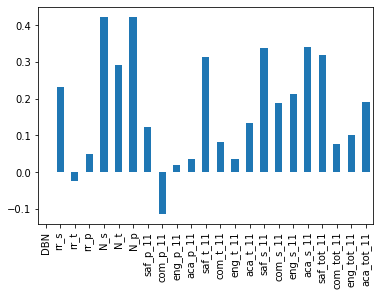

In [146]:
correlations[survey_fields].plot.bar()

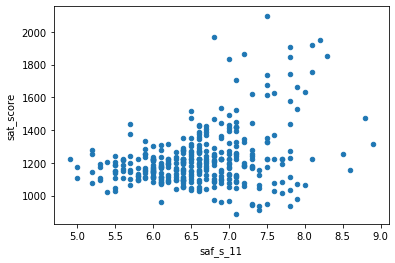

In [147]:
combined.plot('saf_s_11','sat_score',kind='scatter')

From the above plots we can see that safety in the school environment and SAT scores are correlated. Let's investigate further. We will:
* Compute the average safety score for each district.
* Make a map that shows safety scores by district.
* Write up our conclusions about safety by geographic area.

In [148]:
districts = combined.groupby('school_dist').agg('mean') 
districts.reset_index(inplace=True)
districts['saf_s_11'] # Average safety score for each district

0     6.768611
1     6.910660
2     6.716667
3     6.885714
4     6.314286
5     6.950000
6     6.800000
7     6.364697
8     6.655000
9     6.577273
10    6.186667
11    7.116667
12    6.407692
13    6.685714
14    6.177778
15    5.875000
16    6.007143
17    6.190909
18    6.150000
19    7.120000
20    6.390909
21    7.025000
22    6.233333
23    7.107692
24    6.912500
25    6.760000
26    6.390000
27    6.627273
28    6.075000
29    7.033333
30    6.530000
31    6.766667
Name: saf_s_11, dtype: float64

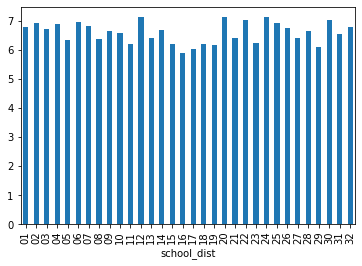

In [149]:
combined.groupby('school_dist').agg('mean')['saf_s_11'].plot.bar()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Text(0.5, 1.0, 'Safety scores')

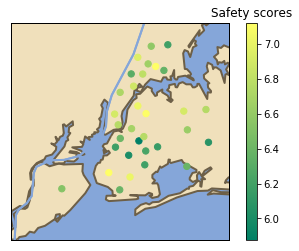

In [150]:
os.environ['PROJ_LIB'] = r'C:\Users\User\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='h'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=2)
m.drawrivers(color='#85A6D9', linewidth=2)
m.fillcontinents(color='#F0E0BB')
m.drawstates(color='#85A6D9', linewidth=2)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=40, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.colorbar().ax.set_title('Safety scores')



Upper Manhattan and parts of Queens and the Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores.
Lets's repeat the process, this time with sat scores for each district:

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Text(0.5, 1.0, 'Sat scores')

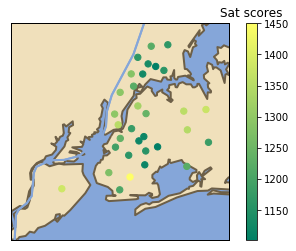

In [151]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='h'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=2)
m.drawrivers(color='#85A6D9', linewidth=2)
m.fillcontinents(color='#F0E0BB')
m.drawstates(color='#85A6D9', linewidth=2)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=40, zorder=2, latlon=True, c=districts["sat_score"], cmap="summer")
plt.colorbar().ax.set_title('Sat scores')


Staten island and parts of Queens seem to have schools with high sat scores. Bronx and the center of Brooklyn seem to have schools with low sat scores and Manhattan has schools with relatively good sat scores.

There are a few columns that indicate the percentage of each race at a given school like the following :

* white_per
* asian_per
* black_per
* hispanic_per

We will plot the correlations between these columns and sat_score, in order to find whether there are any racial differences in SAT performance.

In [152]:
combined.corr()['sat_score'][['white_per','asian_per','black_per','hispanic_per']]

white_per       0.620718
asian_per       0.570730
black_per      -0.284139
hispanic_per   -0.396985
Name: sat_score, dtype: float64

Text(0, 0.5, 'Sat Correlation')

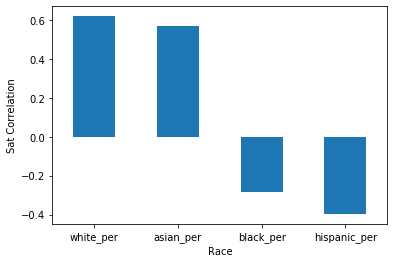

In [153]:
combined.corr()['sat_score'][['white_per','asian_per','black_per','hispanic_per']].plot.bar(rot=0)
plt.xlabel('Race')
plt.ylabel('Sat Correlation')

A higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. 

We will now explore schools with low SAT scores and high values for hispanic_per

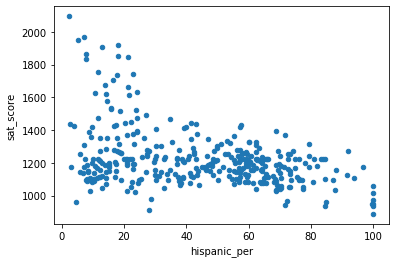

In [154]:
combined.plot.scatter('hispanic_per','sat_score')

In [155]:
combined[combined['hispanic_per']>95]['SCHOOL NAME']

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

The schools listed above appear to have recent immigrants in the US and have a lot of students who are learning English, which explains the lower SAT scores.

Now we will research any schools with a hispanic_per less than 10% and an average SAT score greater than 1800.

In [156]:
combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]['SCHOOL NAME']

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Many of the schools above are elite, selective schools. \
Next we will find the correlation between SAT scores and gender.

In [157]:
combined.corr()['sat_score'][['male_per','female_per']]

male_per     -0.112062
female_per    0.112108
Name: sat_score, dtype: float64

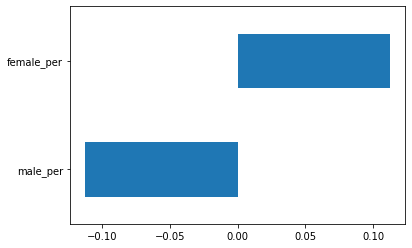

In [158]:
combined.corr()['sat_score'][['male_per','female_per']].plot.barh()

There seems to be a weak correlation between the gender and the sat scores. Men are more likely to have a lower sat score. \
Now let's investigate schools with high SAT scores and a high female percentage.

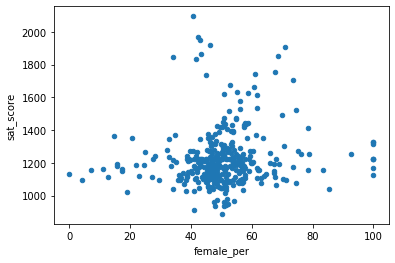

In [159]:
combined.plot.scatter('female_per','sat_score')

From the plot we can observe the following:
* The highest SAT scores are from scools with approximately 40% females
* There are relatively high SAT scores from schools with a 60-70% female percentage

In [160]:
combined[(combined['female_per'] >60 ) & (combined['sat_score'] > 1700)]['SCHOOL NAME']

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

Again, these schools appears to be very selective, with high academic standards

Next let's investigate the correlation between percentage of students taking exams and SAT scores

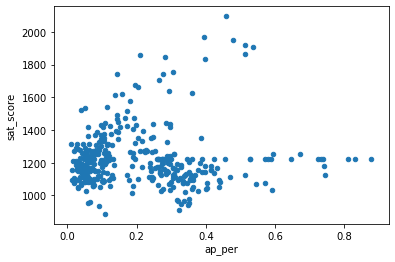

In [161]:
combined['ap_per'] = combined['AP Test Takers ']/combined['total_enrollment'] # Calculate the percentage of students in each school that took an AP exam.
combined.plot.scatter('ap_per','sat_score')


There is a correlation between the two variables, until the AP percentage is 60%. Above that, the correlation is flat.